100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.72it/s]
/tmp/ipykernel_1844243/249727523.py:86: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(_x, _y, RC_G.transpose(),levels=10, colors='black', vmin=0, vmax=10, linewidth=.5)


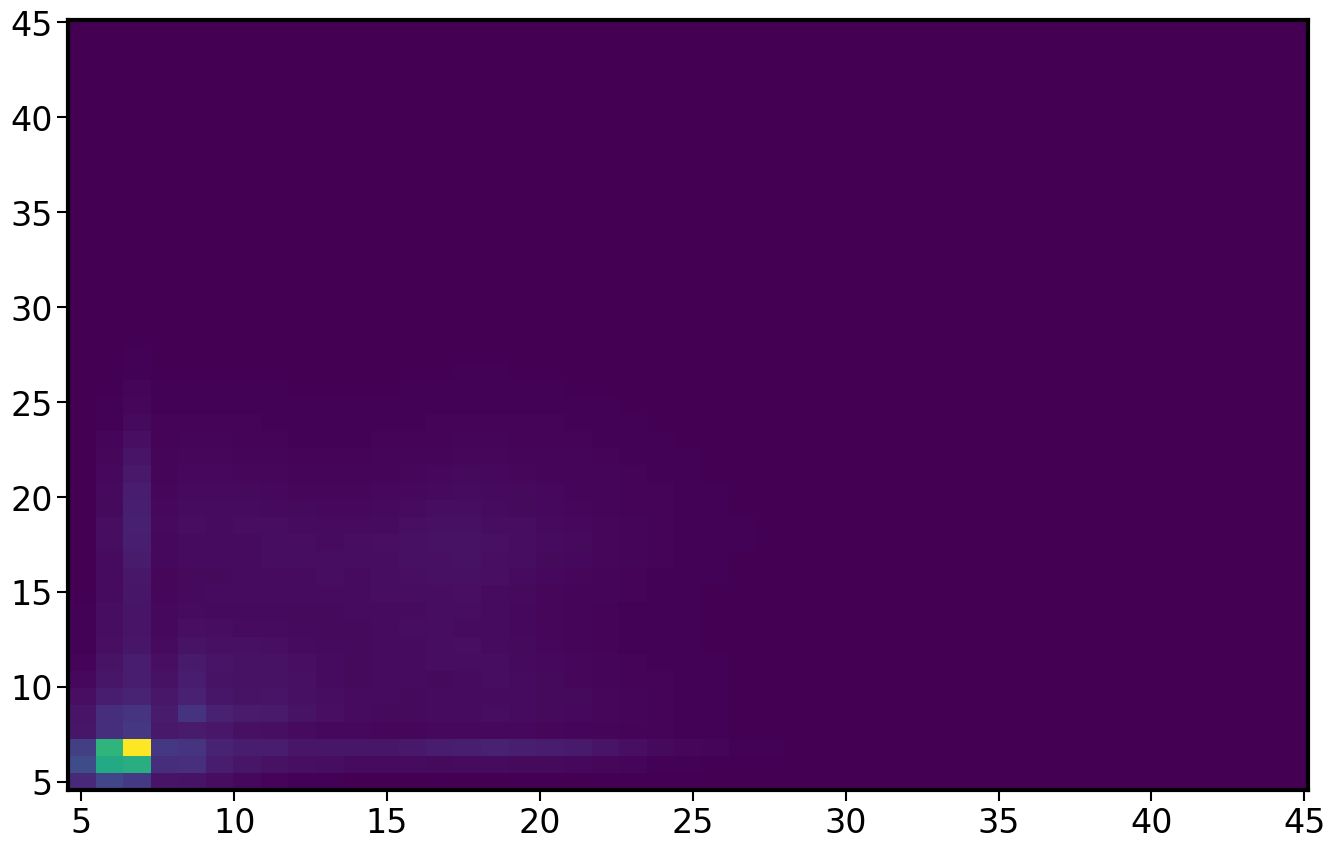

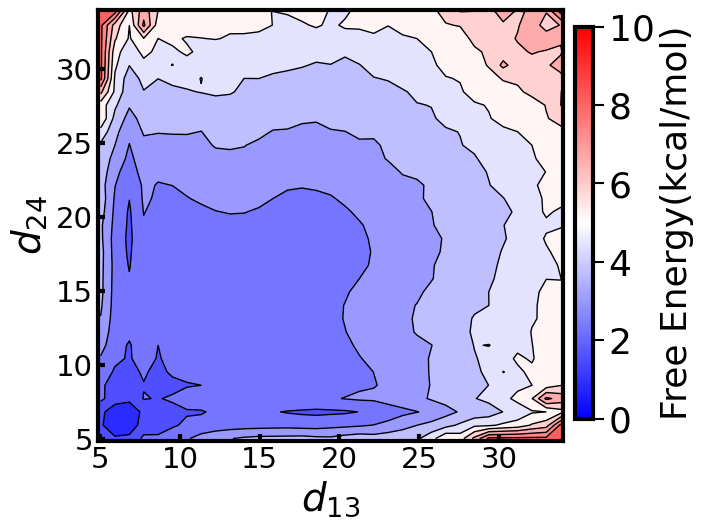

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.ticker as ticker
from tqdm import trange, tqdm
from scipy.constants import Avogadro, Boltzmann, calorie_th
%matplotlib inline

large = 54; med = 30; small = 24
l_width = 3; m_width = 1.5; s_width = 0.7
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'legend.title_fontsize':med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large,
          'lines.linewidth': l_width,
          'lines.markersize': 10,
          'axes.linewidth': l_width,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'xtick.minor.size': 4,
          'ytick.minor.size': 4,
          'xtick.major.width': m_width,
          'ytick.major.width': m_width,
          'xtick.minor.width': s_width,
          'ytick.minor.width': s_width,
          'grid.linewidth': m_width}
plt.rcParams.update(params)

## constant factor
THERMO_CONSTANT = 10**-3 * Boltzmann * Avogadro / calorie_th

## load the six inter-nucleosome distances based trajectories
distrajs = np.load("./177bps_6pdis_mirror_cut_trajs.npy", allow_pickle=True).item()
distrajs = [value for value in distrajs.values()]
distrajs = np.concatenate(distrajs)

## load the equilibrium population of microstate-MSM and the microstate-assigned-trajectories
stationary_population = np.loadtxt("./177bps_0.25ns3tics_1000kmeans_equilibrium_population.txt")
ctrajs= np.load("./177bps_0.25ns3tics_1000kmeans_trajs.npy", allow_pickle=True)
ctrajs = np.concatenate(ctrajs).astype(int)
num_states = np.max(ctrajs) + 1

## randomly regenerate index trajectories to match the size of the microstate-assigned trajectories, 
## ensuring the frequency of each microstate is proportional to its corresponding equilibrium population.
## the number of microstates for NRL=177 system is 1000
idx_trajs = np.random.choice(a=num_states, size=ctrajs.shape[0], p=stationary_population)


## generate the data used to plot free energy landscape
fel_data = []
for i in trange(num_states):
    ## take all the six-distances configurations belonging to state i
    _distrajs = distrajs[ctrajs==i]
    ## randomly select certain number of configurations used to plot free energy landscape
    ## the number of selected configurations is proportional to corresponding equilibrium population
    ## note this randomness may lead to slight fluctuation in estimation of free energy landscape, particularly for the sparse region
    random_idx = np.random.choice(a=len(_distrajs), size=np.sum(idx_trajs==i))
    fel_data.append(_distrajs[random_idx])
fel_data = np.concatenate(fel_data)

## grid the 2-D d13 and d24 map and count the configuration distribution
RC_counts,RC_xbins,RC_ybins,images = plt.hist2d(fel_data[:,1],fel_data[:,4],bins=45)
RC_counts[RC_counts==0]=RC_counts[RC_counts!=0].min()
RC_G=-np.log(RC_counts)*THERMO_CONSTANT*300
RC_G=RC_G-np.nanmin(RC_G)

## symmetrize the map
RC_G=(RC_G.transpose() + RC_G) / 2

_x = np.zeros(len(RC_xbins)-1); _y = np.zeros(len(RC_ybins)-1)
for i in range(len(RC_xbins)-1):
    _x[i] = (RC_xbins[i] + RC_xbins[i+1]) / 2
    _y[i] = (RC_ybins[i] + RC_ybins[i+1]) / 2

fig,ax = plt.subplots(1, 1, figsize=(6,5.6))
plt.contourf(_x, _y,RC_G.transpose(),levels=10, cmap='bwr', vmin=0, vmax=10, alpha=0.9)
plt.rcParams["lines.linewidth"]=1.0
plt.contour(_x, _y, RC_G.transpose(),levels=10, colors='black', vmin=0, vmax=10, linewidth=.5)
plt.xlabel("$d_{13}$",fontsize=28)
plt.ylabel("$d_{24}$",fontsize=28)
plt.xlim(4.85, 34)
plt.ylim(4.85, 34)
ax.spines['bottom'].set_linewidth(3.0)
ax.spines['left'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
plt.tick_params(which='major', width=3, direction='in', labelsize=21, length=5)
plt.tick_params(which='minor', width=1, direction='in', length=3)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5))
l = 0.92; b = 0.15; w = 0.03; h = 0.7
rect = [l, b, w, h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=10), cmap=plt.cm.bwr), cax=cbar_ax)
cb.ax.tick_params(labelsize=26)
cb.set_label('Free Energy(kcal/mol)',fontsize=26)
labels=cb.ax.get_xticklabels()
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})

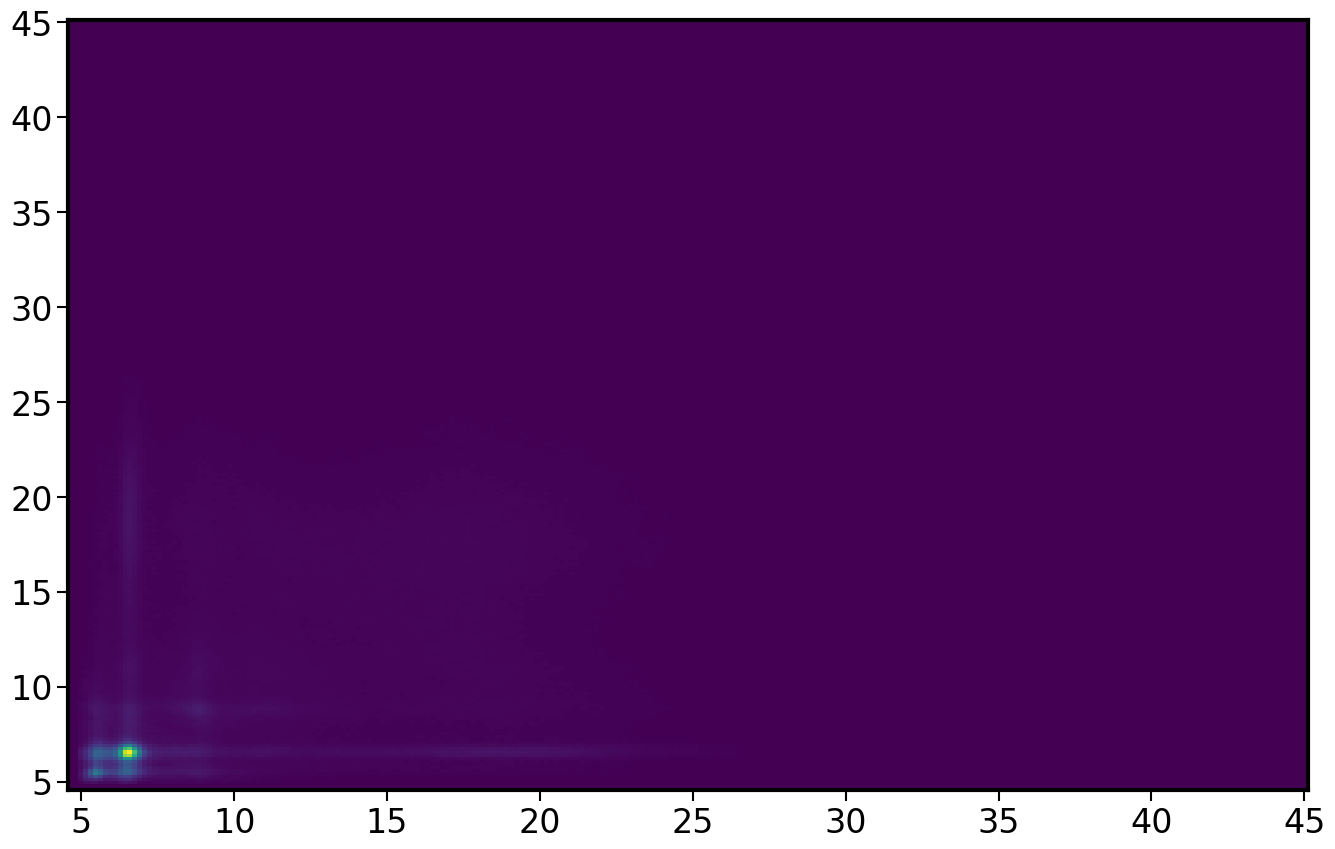

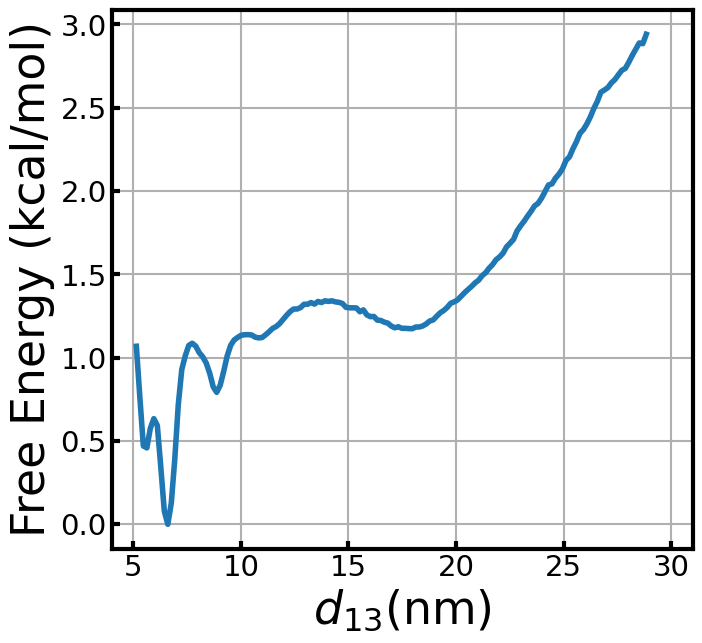

In [2]:
RC_counts,RC_xbins,RC_ybins,images = plt.hist2d(fel_data[:,1],fel_data[:,4],bins=250)
RC_counts[RC_counts==0]=0
RC_G=-np.log(np.sum(RC_counts, axis=0))*THERMO_CONSTANT*300
RC_G=RC_G-np.nanmin(RC_G)


x_coordinate = []
for i in range(1, len(RC_xbins)):
    x_coordinate.append((RC_xbins[i-1] + RC_xbins[i])/2)
    
fig,ax = plt.subplots(1, 1, figsize=(7.5,7))   
plt.plot(x_coordinate[3:150], RC_G[3:150], linewidth=4.0)
plt.ylabel("Free Energy (kcal/mol)",fontsize=33)
plt.xlabel("$d_{13}$(nm)",fontsize=33)
plt.tick_params(which='major', width=3, direction='in', labelsize=21, length=6)
plt.tick_params(which='minor', width=1, direction='in', length=0)
plt.xlim(4, 31)
plt.grid(True)